In [1]:
import pygamma as pg
from matplotlib import pyplot as plt
%matplotlib inline

In [28]:
ss = pg.spin_system(2)
print(dir(ss))

['A', 'AHz', 'AStrings', 'As', 'BeStrings', 'Bo', 'CoherDist', 'FieldAdjust', 'GFStrings', 'GetFlag', 'HS', 'HSvect', 'IsoDefault', 'J', 'JStrings', 'Js', 'Nyquist', 'OmStrings', 'Omega', 'OmegaAdjust', 'PPM', 'PPMStrings', 'PSetAdd', 'SAMStrings', 'SIStrings', 'SYMStrings', 'SYSStrings', 'SetFlag', 'SetFlags', 'VStrings', '__assign__', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__disown__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__swig_destroy__', '__swig_getmethods__', '__swig_setmethods__', '__weakref__', '_s', 'ask_read', 'center', 'check_spin', 'check_spins', 'eepair', 'efield', 'efield_lab', 'electron', 'electrons', 'element', 'enpair', 'eshift', 'gamma', 'getSpins', 'get_basis', 'gfactor', 'heteronuclear', 'h

In [29]:
print(ss)

Spin Index :      0            1      
Isotope    :      1H           1H     
Momentum   :     1/2          1/2     
Shifts     :     0.00 Hz      0.00 Hz 
Js Spin 0  :                  0.00 Hz 



In [129]:
ss.name="two_spin_system"
#ss.Omega(400.0)
ss.spectrometer_frequency(400.0)

ss.shift(0,200)
ss.shift(1,-200)
ss.Js(10)
ham_cs = pg.Hcs(ss)+pg.HJ(ss)
detect = pg.Fp(ss)
ss_eq  = pg.sigma_eq(ss)

In [130]:
print(ss)

Spin Index :      0            1      
Isotope    :      1H           1H     
Momentum   :     1/2          1/2     
Shifts     :     0.00 Hz     -0.00 Hz 
           :     0.50 ppm    -0.50 ppm
Js Spin 0  :                 10.00 Hz 
Omega      :   400.00 MHz   400.00 MHz



In [138]:
npts = 8*1024
fid = pg.row_vector(npts)

In [139]:
ss_0 = pg.Iypuls( ss, ss_eq, 90.0 )

In [140]:
pg.acquire(pg.gen_op(detect), ss_0, ham_cs,   1.0/(2*400), npts, fid)

In [145]:
pg.exponential_multiply( fid, -10 )

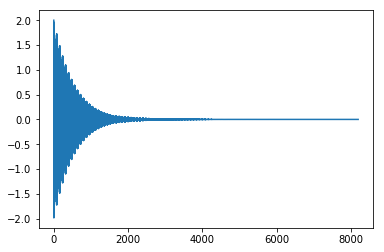

In [146]:
plt.plot(fid.Real())

In [147]:
spec =fid.FFT()

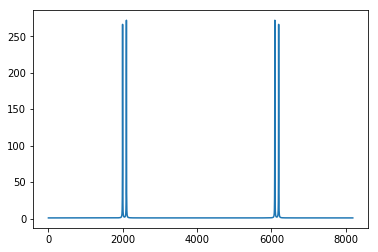

In [148]:
plt.plot( spec.Real() );

In [37]:
ss.write("two_spin.sys")

1

In [38]:
two_spin_sys = pg.spin_system()
two_spin_sys.read("two_spin.sys")

1

In [39]:
print(two_spin_sys)

Spin Index :      0            1      
Isotope    :      1H           1H     
Momentum   :     1/2          1/2     
Shifts     :     0.00 Hz     -0.00 Hz 
           :     0.07 ppm    -0.08 ppm
Js Spin 0  :                  0.00 Hz 
Omega      :   400.00 MHz   400.00 MHz



In [25]:
two_spin_sys

Spin Index :      0            1      
Isotope    :      1H           1H     
Momentum   :     1/2          1/2     
Shifts     :     0.00 Hz     -0.00 Hz 
           :     0.07 ppm    -0.08 ppm
Js Spin 0  :                  0.00 Hz 
Omega      :   400.00 MHz   400.00 MHz

In [149]:
i_19F = pg.Isotope("19F")

In [150]:
print(dir(two_spin_sys))

['A', 'AHz', 'AStrings', 'As', 'BeStrings', 'Bo', 'CoherDist', 'FieldAdjust', 'GFStrings', 'GetFlag', 'HS', 'HSvect', 'IsoDefault', 'J', 'JStrings', 'Js', 'Nyquist', 'OmStrings', 'Omega', 'OmegaAdjust', 'PPM', 'PPMStrings', 'PSetAdd', 'SAMStrings', 'SIStrings', 'SYMStrings', 'SYSStrings', 'SetFlag', 'SetFlags', 'VStrings', '__assign__', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__disown__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__swig_destroy__', '__swig_getmethods__', '__swig_setmethods__', '__weakref__', '_s', 'ask_read', 'center', 'check_spin', 'check_spins', 'eepair', 'efield', 'efield_lab', 'electron', 'electrons', 'element', 'enpair', 'eshift', 'gamma', 'getSpins', 'get_basis', 'gfactor', 'heteronuclear', 'h

In [151]:
i_19F.print()

AttributeError: 'Isotope' object has no attribute 'print'

In [152]:
pg.Isotope.known("25Mg")

True